                                                    IMTIAZ AHMAD
                                                    ELEVVO.Tech
                                                    Cairo,Egypt
                                                    Machine learning program

# Level 1
# Machine learning tasks

# Task 1
# Student Score Prediction

we need to download the dataset from Kaggle to follow the instruction in ML task
Dataset (Recommended): Student Performance Factors (Kaggle)

In [1]:
#import standard libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing


from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.preprocessing import MinMaxScaler    # For normalization
from sklearn.preprocessing import LabelEncoder   # For encoding labels
from sklearn.preprocessing import OneHotEncoder  # For one-hot encoding


#Modeling libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
#load the dataset
df=pd.read_csv("StudentPerformanceFactors.csv")

In [3]:
# Get the fist five row 
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [4]:
# check if there is any missing values
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

Here you can see our missing data in objects types data let's we handle first missing values.

In [5]:
# Fill missing values using mode
for col in ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']:
    df[col] = df[col].fillna(df[col].mode()[0])

In [6]:
#Again i check the missing values  after filling
df.isnull().sum().sum()

0

so,there is no missing values in my data.

In [7]:
# Describe the summary of staticstis
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


 # Basic Data visualization

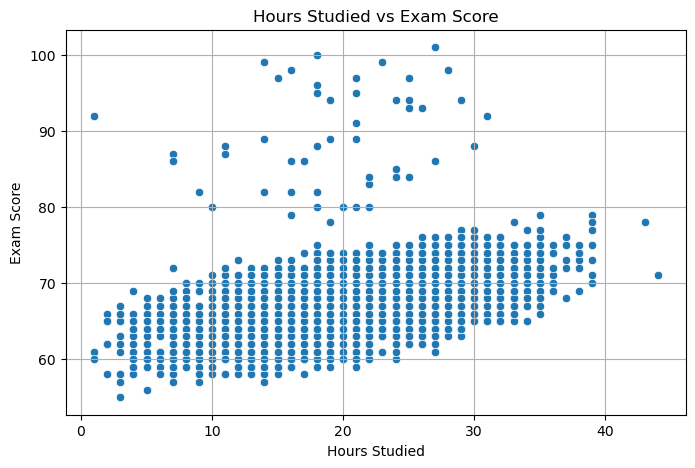

In [8]:
#Visualize Key Features
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Hours_Studied'], y=df['Exam_Score'])
plt.title('Hours Studied vs Exam Score')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.grid(True)
plt.show()

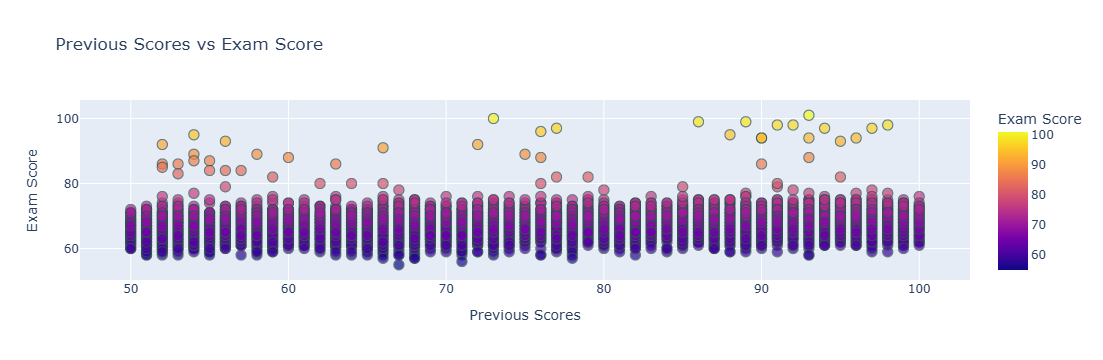

In [9]:
import plotly.express as px

fig = px.scatter(data_frame=df,
                 x='Previous_Scores',
                 y='Exam_Score',
                 color='Exam_Score',
                 title='Previous Scores vs Exam Score',
                 labels={'Previous_Scores': 'Previous Scores', 'Exam_Score': 'Exam Score'},
                 size_max=10)

fig.update_traces(marker=dict(size=10,
                              opacity=0.7,
                              line=dict(width=1, color='DarkSlateGrey')))
fig.show()


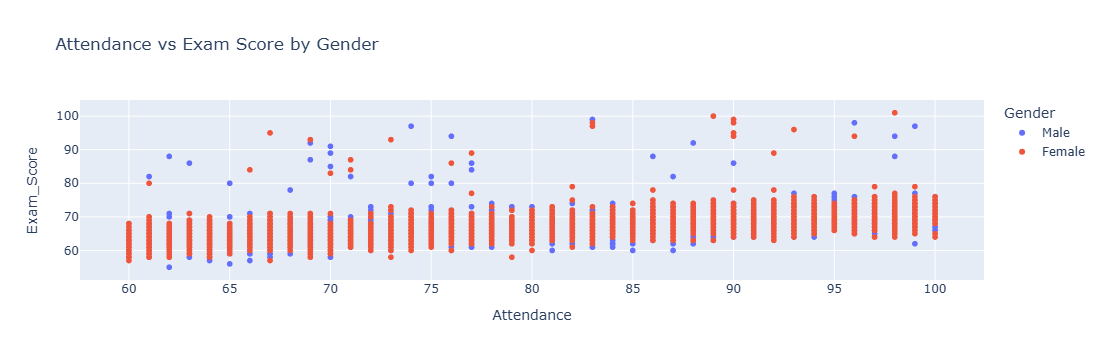

In [10]:
fig = px.scatter(data_frame=df,
                 x='Attendance',
                 y='Exam_Score',
                 color='Gender',  # Or any other feature
                 hover_data=['Hours_Studied', 'Previous_Scores'],
                 title='Attendance vs Exam Score by Gender')
fig.show()


In [11]:
#Select only numerical columns for correlation analysis
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical columns:", numerical_cols)

Numerical columns: Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score'],
      dtype='object')


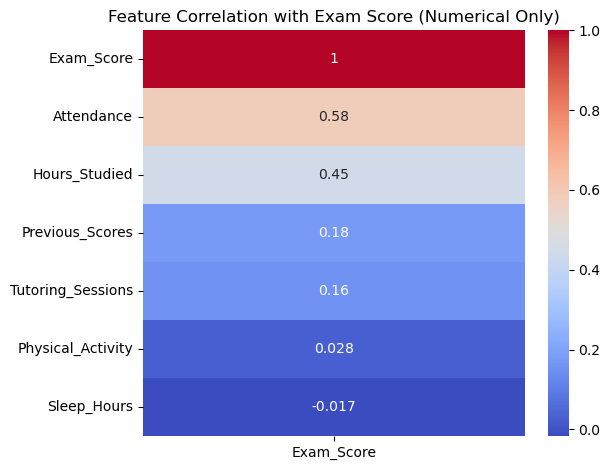

In [12]:
# Correlation Heatmap (using only numerical columns)
plt.subplot(1, 1, 1)
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix[['Exam_Score']].sort_values(by='Exam_Score', ascending=False), 
            annot=True, cmap='coolwarm')
plt.title('Feature Correlation with Exam Score (Numerical Only)')

plt.tight_layout()
plt.show()

# Now i need to prepare the data for modeling

In [13]:
# Detect and encode categorical columns
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])

In [14]:
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,0,0,7,73,1,1,0,1,2,1,2,3,0,1,2,1,67
1,19,64,1,2,0,8,59,1,1,2,2,2,1,0,4,0,0,1,0,61
2,24,98,2,2,1,7,91,2,1,2,2,2,1,1,4,0,2,2,1,74
3,29,89,1,2,1,8,98,2,1,1,2,2,1,0,4,0,1,1,1,71
4,19,92,2,2,1,6,65,2,1,3,2,0,1,1,4,0,0,2,0,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,0,2,0,7,76,2,1,1,0,2,1,2,2,0,1,2,0,68
6603,23,76,0,2,0,8,81,2,1,3,1,0,1,2,2,0,1,2,0,69
6604,20,90,2,1,1,6,65,1,1,3,1,2,1,0,2,0,2,2,0,68
6605,10,86,0,0,1,6,91,0,1,2,1,2,0,2,3,0,1,0,0,68


In [15]:
# Prepare data
X = df.drop('Exam_Score', axis=1)
y = df['Exam_Score']

In [16]:
# Split data into training and testing by 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Train model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [18]:
# Make predictions
y_pred = lr.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nLinear Regression (All features):")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Linear Regression (All features):
Mean Squared Error: 4.40
R-squared: 0.69


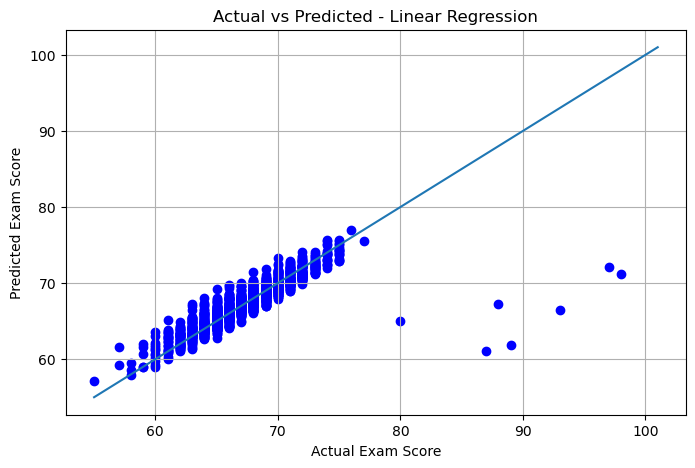

In [28]:
# Visualize Predictions
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()])
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.title('Actual vs Predicted - Linear Regression')
plt.grid(True)
plt.savefig("LR_exam_score_prediction.png", dpi=300)
plt.show()

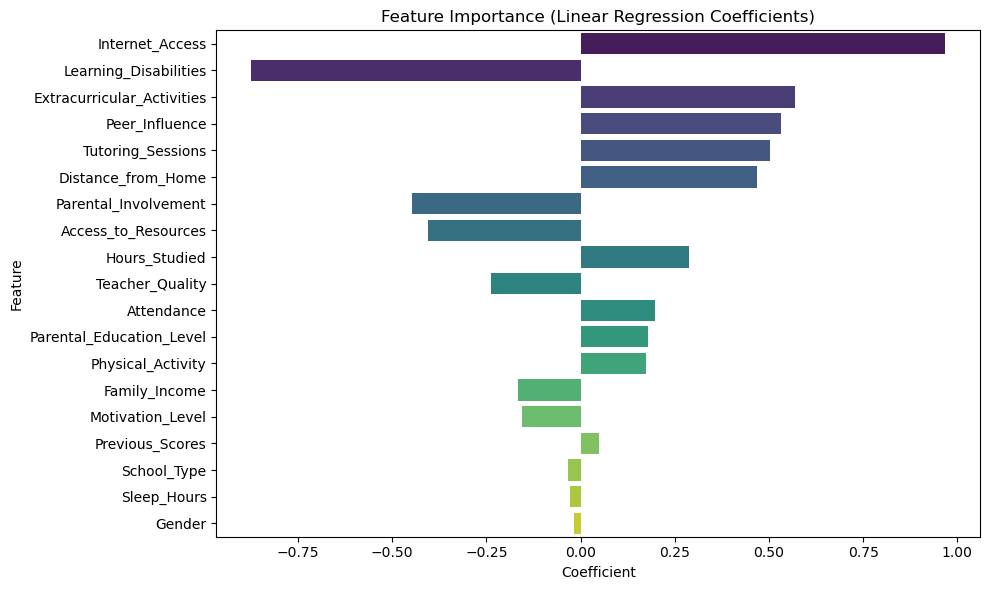

In [32]:
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=coeff_df, x='Coefficient', y='Feature', palette='viridis')
plt.title('Feature Importance (Linear Regression Coefficients)')
plt.tight_layout()
plt.savefig("Feature importance.png", dpi=300)
plt.show()


# Polynomial Regression

In [21]:
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)
y_pred_poly = poly_model.predict(X_poly_test)

print("Polynomial Regression R² Score:", r2_score(y_test, y_pred_poly))
print("Polynomial Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_poly)))

Polynomial Regression R² Score: 0.7581489249624992
Polynomial Regression RMSE: 1.848940905854355


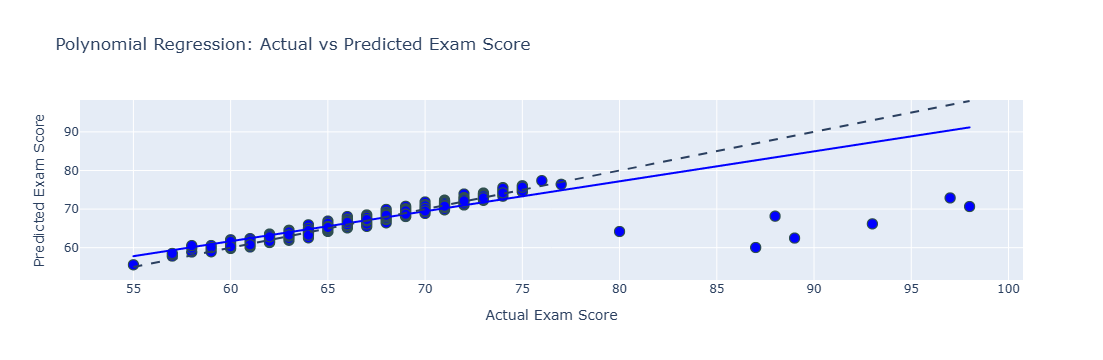

In [31]:
import plotly.express as px
import pandas as pd

# Create DataFrame for comparison
results_df = pd.DataFrame({
    'Actual Exam Score': y_test,
    'Predicted Exam Score': y_pred_poly
})

fig = px.scatter(results_df,
                 x='Actual Exam Score',
                 y='Predicted Exam Score',
                 title='Polynomial Regression: Actual vs Predicted Exam Score',
                 trendline="ols")  # adds a best-fit line

fig.update_traces(marker=dict(size=10, color='blue', line=dict(width=1, color='DarkSlateGrey')))
fig.add_shape(type='line', line=dict(dash='dash'),
              x0=results_df.min().min(), y0=results_df.min().min(),
              x1=results_df.max().max(), y1=results_df.max().max())

fig.show()
fig.write_image("polynomial_regression_plot.png", width=800, height=600, scale=2)


# Experiment with Feature Sets

In [23]:
 #Use only Hours_Studied, Sleep_Hours, Previous_Scores
features = ['Hours_Studied', 'Sleep_Hours', 'Previous_Scores']
X2 = df[features]
y2 = df['Exam_Score']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

model2 = LinearRegression()
model2.fit(X2_train, y2_train)
y2_pred = model2.predict(X2_test)

print("Simplified Model R² Score:", r2_score(y2_test, y2_pred))
print("Simplified Model RMSE:", np.sqrt(mean_squared_error(y2_test, y2_pred)))

Simplified Model R² Score: 0.25134367387454337
Simplified Model RMSE: 3.2530464840200186


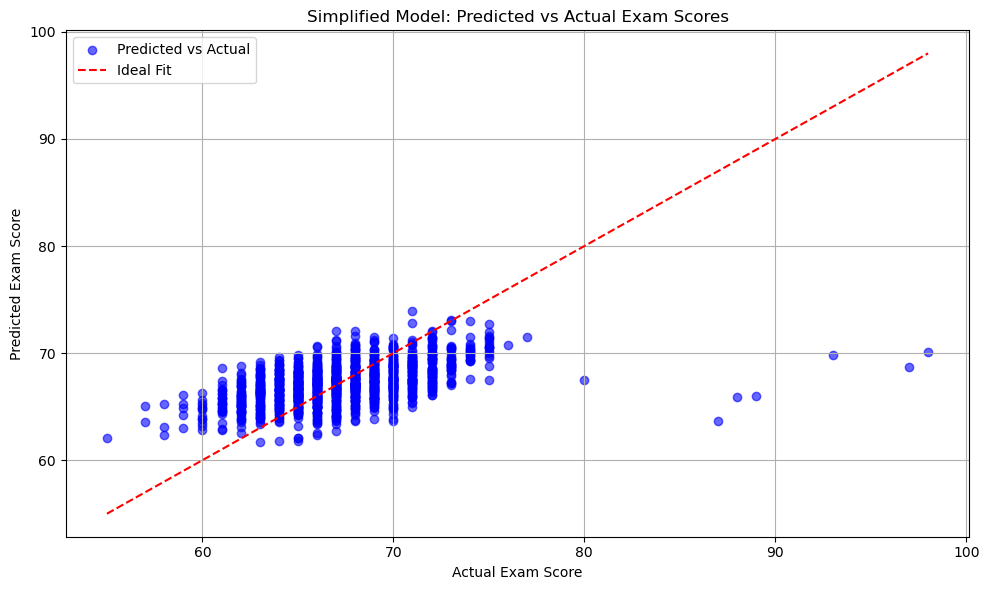

In [27]:
# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y2_test, y2_pred, color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot([y2_test.min(), y2_test.max()], [y2_test.min(), y2_test.max()], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.title('Simplified Model: Predicted vs Actual Exam Scores')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

~~~

                               _             _ 
     /\                       (_)           | |
    /  \   _ __ ___   __ _ _____ _ __   __ _| |
   / /\ \ | '_ ` _ \ / _` |_  / | '_ \ / _` | |
  / ____ \| | | | | | (_| |/ /| | | | | (_| |_|
 /_/    \_\_| |_| |_|\__,_/___|_|_| |_|\__, (_)
                                        __/ |  
                                       |___/                                                             
~~~

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />